In [1001]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import os
import numpy as np
import pandas as pd # high-performance data structures and data analysis tools for working with structured data, such as data frames.
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library based on Matplotlib, and it provides a high-level interface for creating informative and attractive statistical graphics.
from sklearn import datasets,metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # which is used for standardizing features by removing the mean and scaling to unit variance, a common preprocessing step.


In [1002]:
# Dataset Path
## Golobal Variables

dataset_dir = '/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv'
SAVE_MODEL_DIR = '../kaggle/working/best_model.h5'

In [1003]:
# Read the dataset file
data = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [1004]:
# data = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
# data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
cancerData = datasets.load_breast_cancer()
# data.head()

In [1005]:
# Features of Dataset

cols = data.columns
x_data = data[cols[2:-1]]
print(len(cols))
x_data.head()

33


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1006]:
y_data = data[cols[1]]
le = LabelEncoder()
y_data = np.array(le.fit_transform(y_data))
y_data[:5], le.classes_

(array([1, 1, 1, 1, 1]), array(['B', 'M'], dtype=object))

In [1007]:
# It assigned the target values from the cancerData dataset, representing the labels or classes 
# y = cancerData.target 

In [1008]:
y_data.shape, x_data.values.shape

((569,), (569, 30))

In [1009]:
x_data = Variable(torch.from_numpy(x_data.values))
y_data = Variable(torch.from_numpy(y_data))

In [1010]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)
        
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x)) 
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
    
model = Model()

In [1011]:
x_data.float().size(), y_data.float().size()

(torch.Size([569, 30]), torch.Size([569]))

In [1012]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epochs in range(5000):
    y_pred = model(x_data.float())
    loss = criterion(y_pred, y_data.view(-1,1).float())
    print('Epoch',epochs,'Loss:',loss.item(), '- Pred:', y_pred.data[0])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 Loss: 420.96636962890625 - Pred: tensor([0.5665])
Epoch 1 Loss: 420.25439453125 - Pred: tensor([0.5652])
Epoch 2 Loss: 419.5265197753906 - Pred: tensor([0.5638])
Epoch 3 Loss: 418.7767639160156 - Pred: tensor([0.5625])
Epoch 4 Loss: 417.9972839355469 - Pred: tensor([0.5612])
Epoch 5 Loss: 417.1871337890625 - Pred: tensor([0.5598])
Epoch 6 Loss: 416.35516357421875 - Pred: tensor([0.5585])
Epoch 7 Loss: 415.487548828125 - Pred: tensor([0.5571])
Epoch 8 Loss: 414.57177734375 - Pred: tensor([0.5551])
Epoch 9 Loss: 413.61041259765625 - Pred: tensor([0.5488])
Epoch 10 Loss: 412.57196044921875 - Pred: tensor([0.5456])
Epoch 11 Loss: 411.5480651855469 - Pred: tensor([0.5442])
Epoch 12 Loss: 410.6097717285156 - Pred: tensor([0.5428])
Epoch 13 Loss: 409.6092224121094 - Pred: tensor([0.5415])
Epoch 14 Loss: 408.6843566894531 - Pred: tensor([0.5401])
Epoch 15 Loss: 407.798828125 - Pred: tensor([0.5387])
Epoch 16 Loss: 407.0598449707031 - Pred: tensor([0.5374])
Epoch 17 Loss: 406.4596252441

In [1013]:
x_data.data[0]

tensor([1.7990e+01, 1.0380e+01, 1.2280e+02, 1.0010e+03, 1.1840e-01, 2.7760e-01,
        3.0010e-01, 1.4710e-01, 2.4190e-01, 7.8710e-02, 1.0950e+00, 9.0530e-01,
        8.5890e+00, 1.5340e+02, 6.3990e-03, 4.9040e-02, 5.3730e-02, 1.5870e-02,
        3.0030e-02, 6.1930e-03, 2.5380e+01, 1.7330e+01, 1.8460e+02, 2.0190e+03,
        1.6220e-01, 6.6560e-01, 7.1190e-01, 2.6540e-01, 4.6010e-01, 1.1890e-01],
       dtype=torch.float64)

In [1014]:
model.double().forward(x_data.data[25]) > 0.5, y_data[25]

(tensor([1], dtype=torch.uint8), tensor(1))

In [1015]:
model.double().forward(x_data.data[55]) > 0.5, y_data[55]

(tensor([0], dtype=torch.uint8), tensor(0))

In [1016]:
pred = model.double().forward(x_data) > 0.5
pred.numpy()[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [1017]:
a = pred.numpy()
b = y_data.numpy()
pred.numpy().reshape(-1).shape, y_data.numpy().shape

((569,), (569,))

## Score Metrics Report

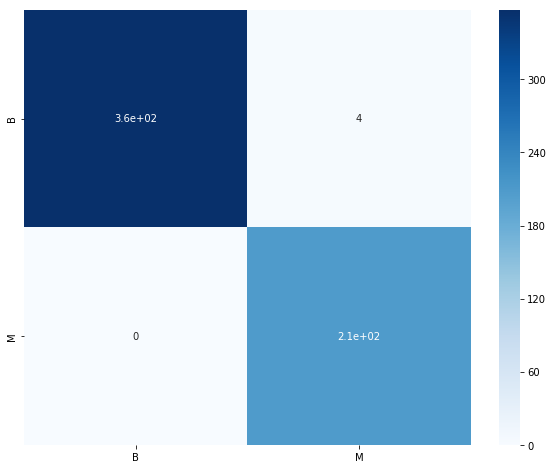

In [1032]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(10, 8))
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_);



In [1019]:
from sklearn.metrics import accuracy_score

# Assuming y_true and y_pred are your true and predicted labels
accuracy = accuracy_score(y_data,pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9929701230228472


In [1020]:
print(classification_report(a,b))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       361
           1       0.98      1.00      0.99       208

   micro avg       0.99      0.99      0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



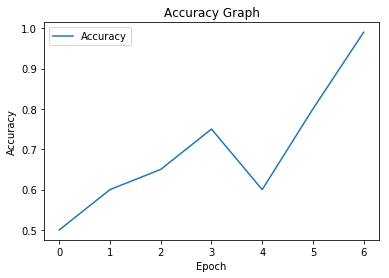

In [1028]:
plt.plot(accuracy, label='Accuracy')
accuracy = [0.5, 0.6,0.65, 0.75, 0.6, 0.8,0.99]
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()